# Qiskit Basics

## Tutorial: Preliminaries and analysis of a circuit

### Verfy the correctness of Qisikit installation and retrieve its version

In [3]:
import qiskit
from qiskit import __version__
print("Qiskit",__version__)
!python --version

Qiskit 1.4.1
Python 3.11.5


As alternative you can use the Helpers.ipynb librarary

In [4]:
#import helper utilities
import os
import sys
sys.path.insert(0, os.path.abspath('../../utils'))
import Helpers as hp
#check qiskit version
import qiskit
hp.get_qiskit_version()

The current qiskit version is: 1.4.1


In [5]:
hp.get_python_version()

The current python version is: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


## Create the Bell state:
- $\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ 

The circuit is created with 2 qubits, named $q_o$ and $q_1$, respectively and 2 classical bits.

To an instance of QuantumCircuit we can append quantum gates using methods (functions) as h(.) x(.), z(.), y(.), cx(.,.) etc.

In [6]:
from qiskit import QuantumCircuit
circ=QuantumCircuit(2,2)
circ.h(0)
circ.cx(0,1)

To visualize the circuit you can use the draw method

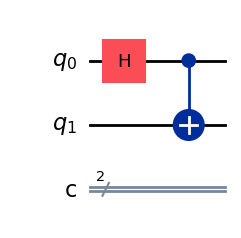

In [7]:
circ.draw(output='mpl')

### Undertanding LSB and MSB in qiskit
Qiskit adopts the little-endian convention, which means that the least significant bit (LSB) is on the rightmost side of the binary string.
When interpreting bits as a number, bit in position 0 is the least significant bit, and bit in position n is the most significant. This is helpful when coding because each bit has the value 
$2^{label}$ (label being the qubit's index in QuantumCircuit.qubits).

To describe the initial quantum state $|q_0q_1q_2q_3\rangle$ qiskit adopt the convention where the  least siginificant qubit is at the top. See the previous Bell circuit or tthe following circuit.

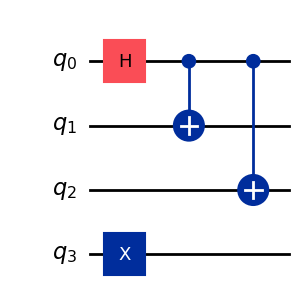

In [8]:
qc=QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.x(3)
qc.draw(output='mpl')

You can change this with the reverse_bits argument of QuantumCircuit.draw (see Change ordering in Qiskit), as shown bellow.  This only affects the generated diagram and does not affect the circuit; the X-gate still acts on qubit $q_3$ .

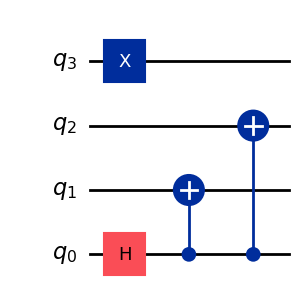

In [9]:
qc=QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.x(3)
qc.draw(output='mpl',reverse_bits=True)

You can use the reverse_bits method to return a new circuit with the qubits' labels reversed (this does not mutate the original circuit). Note that now the X-gate act on qubit $q_0$

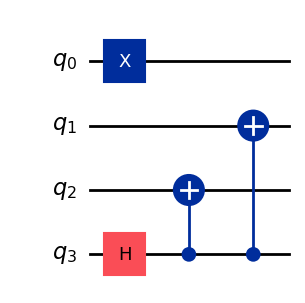

In [10]:
qc.reverse_bits().draw(output='mpl')

### State vector convention
As commonly assumed in literature, the involved state vectors are indexed in ascending order:
Bra-ket notation 

$\alpha|00\rangle + \beta|10\rangle$ 

Vector Notation

\begin{pmatrix}
\alpha \\
0  \\
\beta \\
0 \\
\end{pmatrix}

Qiskit notation

$[\alpha,0,\beta,0]$

Consider the example below where the input state is set to $|01\rangle = (0 \: 1 \: 0 \: 0)^T = [0,1,0,0]$. We use Statevector method to set the initial input state and the evolve method to derive the output state.

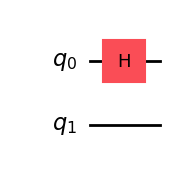

In [11]:
from qiskit.quantum_info import Statevector # to compute state vectors
from qiskit.visualization import array_to_latex
qc=QuantumCircuit(2)
qc.h(0)
stateVecIn=Statevector([0,1,0,0])
qc.draw(output='mpl')

In [12]:
hp.derive_unitary_matrix(qc)

<IPython.core.display.Latex object>

Before evolving the circuit we have:

In [13]:
array_to_latex(Statevector(qc), prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

If we evolve the circuit we obtain as output state $|0-\rangle \equiv \frac{|00\rangle -|01\rangle}{\sqrt{2}} \equiv ( \frac{1}{\sqrt{2}} -  \frac{1}{\sqrt{2}} \:\: 0  \:\: 0)^T$

In [14]:
stateVecOut=stateVecIn.evolve(qc)
# Display the evolved state vector
array_to_latex(stateVecOut, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

### Analysis of a circuit
We have alreday introduced in previous example the concept of state vector and its evolution.
Now apply these concepts to analyze the above defined circuit named $circ$.

In [15]:
stateVecIn=Statevector([0,0,0,1])
array_to_latex(stateVecIn, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

In [16]:
stateVecOut=stateVecIn.evolve(circ)
array_to_latex(stateVecOut, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

You can use the utility plot_statevector(stateVec,label) to plot results

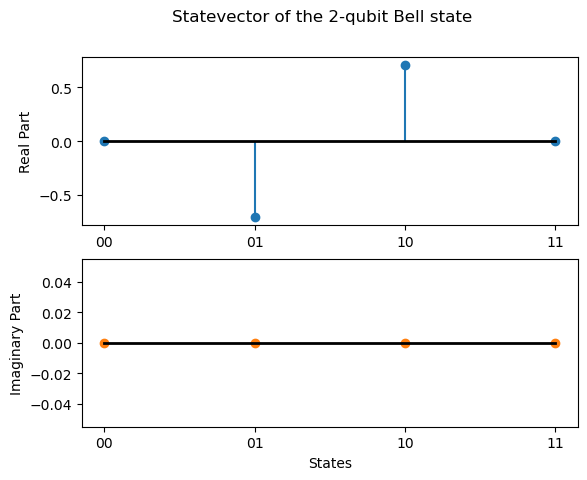

In [17]:
hp.plot_statevector(stateVecOut, "Statevector of the 2-qubit Bell state")

For more complex systems, you can use from_label static methods of Statevector. 

See the following example to initialize a two-qubit state $|+1\rangle= |+\rangle \otimes |1\rangle = (|01\rangle + |11\rangle) $


In [18]:
psi=Statevector.from_label('+1')
array_to_latex(psi, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

In [19]:
probs=psi.probabilities()
print("probabilities: {}".format(probs))

probabilities: [0.  0.5 0.  0.5]


Try this state as an input to the circuit described above.

You can also extract the unitary matrix representing a circuit. See below.

In [20]:
from qiskit.quantum_info import Operator
UnitaryRepresentation=Operator(circ)
print('Unitary matrix representing the circuit:')
print(UnitaryRepresentation.data)

Unitary matrix representing the circuit:
[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]


As alternative you can use from the utilities Helpers the function derive_unitary_matrix

In [21]:
hp.derive_unitary_matrix(circ)

<IPython.core.display.Latex object>

## Tutorial: simulation of a quantum circuit

Now we redefine the circuit $circ$ and add measurements. Then we use AerSimulator library to simulate the circuit.

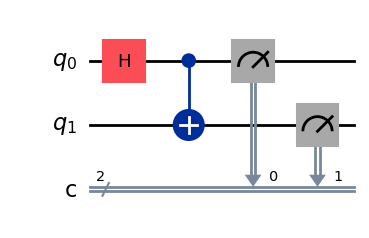

In [22]:
from qiskit import QuantumCircuit
circ=QuantumCircuit(2,2)
circ.h(0)
circ.cx(0,1)
circ.measure([0,1],[0,1])
circ.draw(output='mpl')

Now we import and instantiate the ideal AerSimulator

In [23]:
from qiskit_aer import AerSimulator
idealSim=AerSimulator()

Run the simulator for the defined circuit. We can specify the number of itarations the simulator should execute, with the parameter shots.

In [24]:
result=idealSim.run(circ, shots=1000).result()

Now we can get anf plot the results

In [25]:
print(result.get_counts())

{'00': 485, '11': 515}


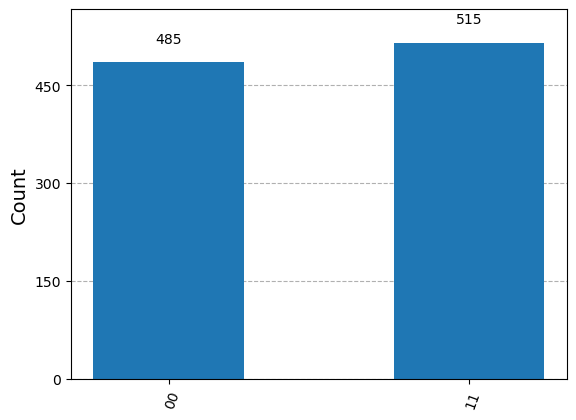

In [26]:
from qiskit.visualization import plot_histogram  # to plot histograms of simulation results
plot_histogram(result.get_counts())

## Tutorial: emulate a quantum computer architecture
The figure shows the quantum architecture of three quanum comupters with 5 qubits: a) Athens, b) Yorktown and c) Vigo.
- (a) Athens 5 qubit, has the linear connectivity; 
- (b) Yorktown 5 qubit, has the bow-tie connectivity;
- (c) Vigo 5 qubit, has the “T” connectivity.

To emulate the 5-qubit quantum computer Athens having a linear connectivity (see figure below), we use the class CouplingMap giving as input the list of directed edges (each represented by two qubits indexes) of the qubit architecture graph.



![arch](res/QC_architectures.png)






In [27]:
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap
architecture=CouplingMap([[0,1],[1,2],[2,3],[3,4],[4,3],[3,2],[2,1],[1,0]])

List what operations the quantum computer can execute, i.e., the elementary
quantum gates the computer can use to construct a generic
gate:
1

In [28]:
gatesQcomp=["id","rz","sx","x","cx"]

Instantiate, with the class GenericBackendV2, the custom quantum
computer backend:

In [29]:
from qiskit.providers.fake_provider import GenericBackendV2
nQubit = 5
customQcomputer = GenericBackendV2 ( nQubit , gatesQcomp ,
coupling_map = architecture , noise_info = False )

Define the circuit to test.

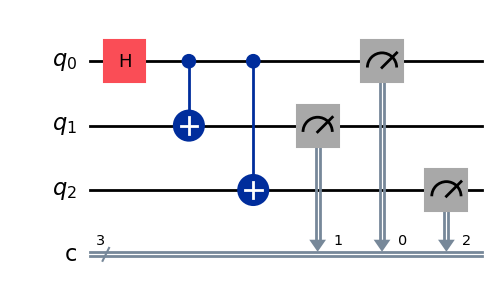

In [30]:
# Circuit definition #
circ = QuantumCircuit (3, 3)
circ.h (0)
circ.cx(0, 1)
circ.cx(0, 2)
circ.measure ([0 , 1, 2], [0, 1, 2])
circ.draw(output='mpl')

Transpile the ideal circuit to a quantum circuit executable on the designed
custom quantum computer:

c:\Users\admin\anaconda3\Lib\site-packages\qiskit_aer\noise\noise_model.py:377: UserWarning: Qiskit backend <qiskit.providers.fake_provider.generic_backend_v2.GenericBackendV2 object at 0x0000017A81F4E690> has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


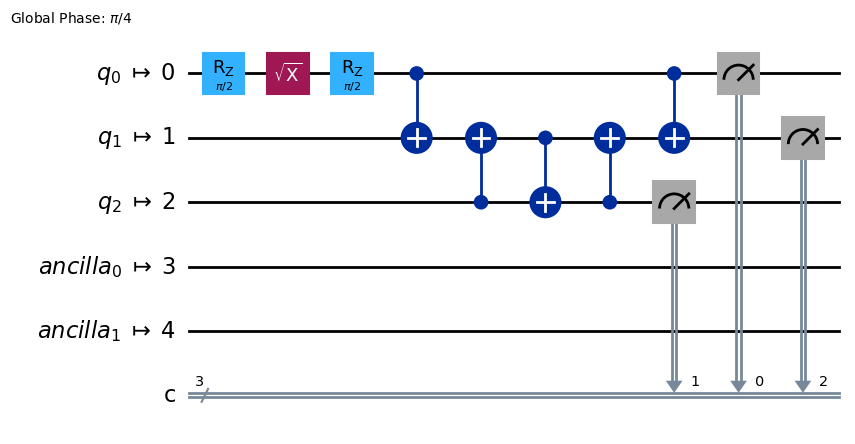

In [31]:
ourSim = AerSimulator.from_backend (customQcomputer)
transpiledCird = transpile(circ , ourSim , optimization_level= 0)
transpiledCird.draw(output='mpl')

Note that the CNOT operation between qubit $q_0$ and qubit $q_2$ in our architecture
is not possible and the transpiler has find another way to implement it.
Moreover, even with the optimization level set to zero, the transpiler has
shuffled the assignment between quantum and classical bits to reduce
the overall number of gates.

Now transpile the circuit with maximul optimization level, i.e. 3

c:\Users\admin\anaconda3\Lib\site-packages\qiskit_aer\noise\noise_model.py:377: UserWarning: Qiskit backend <qiskit.providers.fake_provider.generic_backend_v2.GenericBackendV2 object at 0x0000017A81F4E690> has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


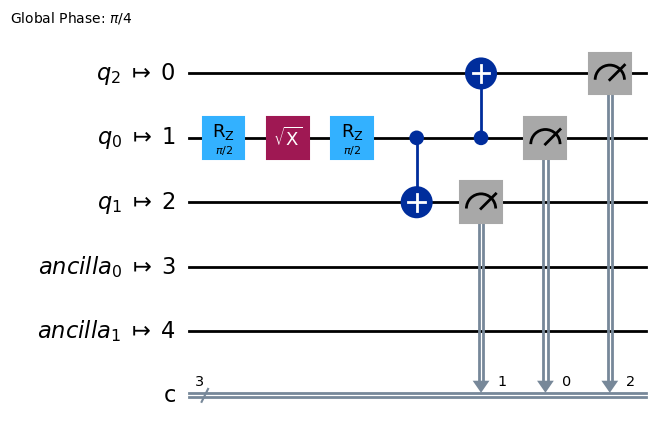

In [32]:
# Transpile #
ourSim = AerSimulator.from_backend(customQcomputer)
transpiledCird = transpile (circ , ourSim , optimization_level = 3)
transpiledCird.draw(output='mpl')

Compare the transpiled solution with the previous one.